In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First, let's load and open the cleaned CSV file and use it moving forward. We'll call it df_clean. 

In [2]:
with open('../data/Aviation_Data_Cleaned_v3.csv', encoding='utf8') as f:
    dtypes = {'Column6Name': 'str', 'Column7Name': 'str', 'Column28Name': 'str'}
    df_clean = pd.read_csv(f, dtype=dtypes, low_memory=False)

### Accident Severity by Manufacturer

We need to find a subset of manufacturers to 

In [3]:
df_clean['Manufacturer'].value_counts()

Boeing               938
Mcdonnell Douglas    291
Airbus               177
Beech                111
Embraer              110
Bombardier            96
Douglas               85
Lockheed              38
Cessna                32
Gulfstream            10
Learjet                9
Convair                8
Dassault               3
Hawker                 3
Raytheon               3
Name: Manufacturer, dtype: int64

We need a minimum number of observations to make a useful statisical observation. 100 seems like a good cutoff, and the conveniently leaves us with 5 manufacturers. Let's keep only these. 

In [4]:
top_5_list = df_clean['Manufacturer'].value_counts().head().index.tolist()
top_5_list

['Boeing', 'Mcdonnell Douglas', 'Airbus', 'Beech', 'Embraer']

In [5]:
df_top_manufacturers = df_clean[df_clean['Manufacturer'].isin(top_5_list)]

Let's look at the distribution of each manufacturer in the market given the data we have. 

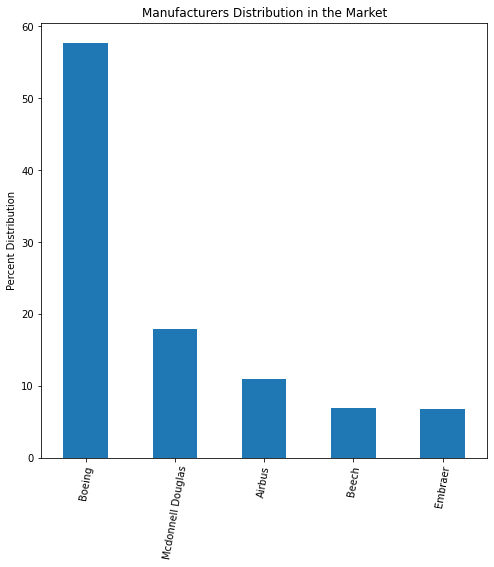

In [6]:
(df_top_manufacturers['Manufacturer'].value_counts(normalize=True) * 100).plot(kind='bar', figsize=(8,8), 
                title='Manufacturers Distribution in the Market', ylabel= "Percent Distribution", rot=80);

Great! As expected with the data, Boeing makes up about 58% of the data. Let's look at total number of passengers per manufacturer and see if it lines up. 

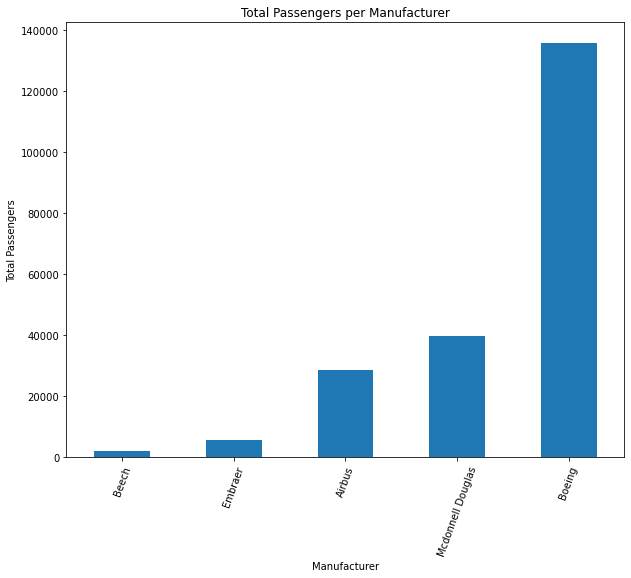

In [7]:
x=df_top_manufacturers.groupby('Manufacturer')['Total.Passengers'].sum().sort_values().plot(kind='bar', 
                                                                                figsize=(10,8), rot=70)

plt.xlabel('Manufacturer')
plt.ylabel('Total Passengers')
plt.title('Total Passengers per Manufacturer')
plt.show()

Yes, Boeing has the most number of passengers. This lines up. Let's look at the different injury levels per manufacturer. 

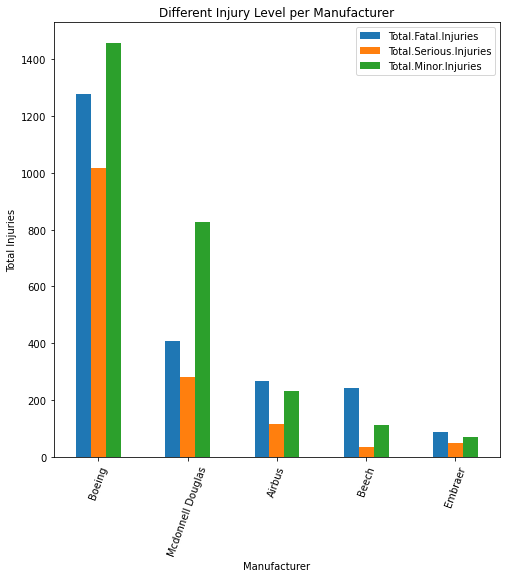

In [18]:
df_top_manufacturers.groupby('Manufacturer')[['Total.Fatal.Injuries', 
                                          'Total.Serious.Injuries', 
                                          'Total.Minor.Injuries']].sum().sort_values(by='Total.Fatal.Injuries', 
                                                                                     ascending=False).plot(kind='bar', 
                                                                                                           figsize=(8,8), 
                                                                                                           title='Different Injury Level per Manufacturer', 
                                                                                                           ylabel='Total Injuries', 
                                                                                                           rot=70);


Here, I notice that Beech, Airbus, and Embrear tend to have more fatal injuries than serious or mild. Boeing and Mcdonnell Douglas seem to have more minor injuries than fatalities. 

Let's look at percentage of fatal/serious injuries per accident

In [19]:
manufacturer_injury_level = df_top_manufacturers[['Total.Passengers','Total.Fatal.Injuries', 
                    'Total.Serious.Injuries', 'Manufacturer']].groupby('Manufacturer').sum()

In [10]:
manufacturer_injury_level['Fatal and Serious Percentage'] = ((manufacturer_injury_level['Total.Fatal.Injuries'] 
                                                             + manufacturer_injury_level['Total.Serious.Injuries']) 
                                                             / manufacturer_injury_level['Total.Passengers']) * 100

In [11]:
manufacturer_injury_level.head()

,Total.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Fatal and Serious Percentage
Manufacturer,,,,
Airbus,28521.0,266.0,117.0,1.342870
Beech,1909.0,243.0,35.0,14.562598
Boeing,135788.0,1275.0,1018.0,1.688662
Embraer,5676.0,87.0,49.0,2.396054
Mcdonnell Douglas,39662.0,408.0,282.0,1.739700


Here, we see that per accident, Beech has the highest percentage of fatalities or serious injuries at 14% (inversely, it has the smallest percentage of minor or no injuries at 85%). 

#### Let's visualize it: 

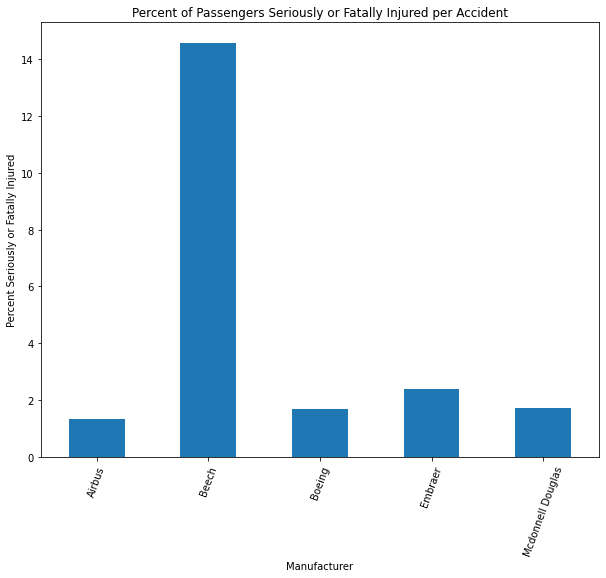

In [12]:
manufacturer_injury_level['Fatal and Serious Percentage'].plot(kind='bar', xlabel='Manufacturer', 
                                                               ylabel='Percent Seriously or Fatally Injured', 
                                                               title='Percent of Passengers Seriously or Fatally Injured per Accident',
                                                               figsize=(10,8), 
                                                              rot=70);

So we know we don't want a Beech plane. But these others look a little close. Let's look closer.

In [13]:
manufacturer_injury_level2 = manufacturer_injury_level.drop(index='Beech')

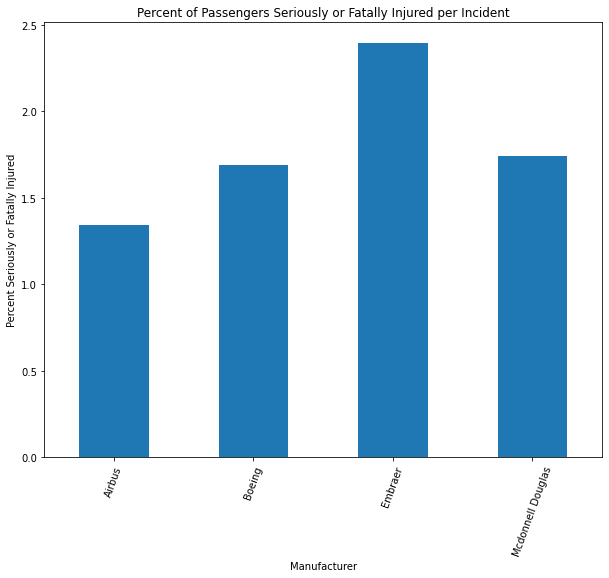

In [14]:
manufacturer_injury_level2['Fatal and Serious Percentage'].plot(kind='bar', xlabel='Manufacturer', 
                                                               ylabel='Percent Seriously or Fatally Injured', 
                                                               title='Percent of Passengers Seriously or Fatally Injured per Incident',
                                                               figsize=(10,8), 
                                                              rot=70);

In [15]:
# ratio between seriously injured vs fatally injured
# sns barplot it will give you the error bars
#^compute fraction injured per accident (serious vs fatal, etc.), then instead of groupby agg, SNS barplot will plot as a fucntion of manufacturer
# x is manu, y is fraction injured per accident
# will do group by aggregation for you computes mean by default
# auto computes the 95% confidence level in estimateion of the mean
# see if the difference in a percent or so is meaningful
# then next plot, zoom in (just look at a few on a scale that is appropriate)

We can see here that flying on a Beech plane gives you the highest chance of sustaining a serious or fatal injury. Let's look at the inverse below. 

Let's see if we can come up with an explanation as to why Beech has more severe injuries. Let's start with investigating the number of engines and engine type.

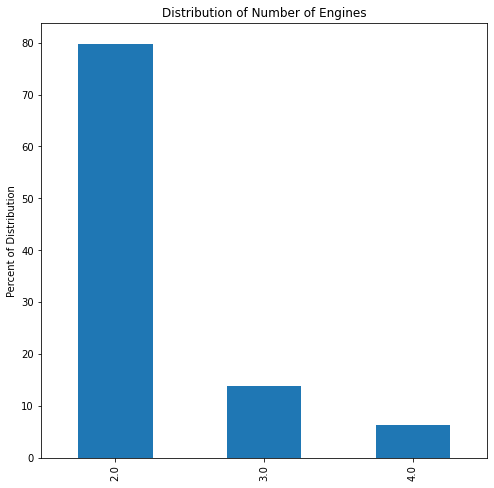

In [16]:
(df_clean['Number.of.Engines'].value_counts(normalize=True) * 100).plot(kind='bar', figsize=(8,8),
                            title='Distribution of Number of Engines', ylabel= "Percent of Distribution");

The market is made up mainly of 2 engine planes. Let's see what kind of engines they are.

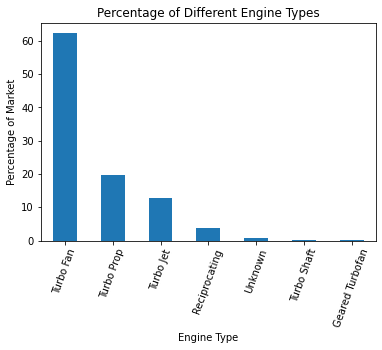

In [17]:
(df_clean['Engine.Type'].value_counts(normalize=True)*100).plot(kind="bar", 
                                                                        title=('Percentage of Different Engine Types'), 
                                                                        rot=70, xlabel=('Engine Type'), 
                                                                        ylabel='Percentage of Market');

In [20]:
df_top_manufacturers['Aircraft.damage'].value_counts()

Undamaged      727
Minor          510
Substantial    333
Destroyed       57
Name: Aircraft.damage, dtype: int64

In [61]:
top_manufacturers = df_top_manufacturers['Manufacturer'].value_counts().index.tolist()

normalized_damage = {}

for i in top_manufacturers:
    normalized_damage[i] = df_top_manufacturers[df_top_manufacturers['Manufacturer']
                                                == i]['Aircraft.damage'].value_counts(normalize=True).to_dict()

normalized_damage

{'Boeing': {'Undamaged': 0.4914712153518124,
  'Minor': 0.31449893390191896,
  'Substantial': 0.17270788912579957,
  'Destroyed': 0.021321961620469083},
 'Mcdonnell Douglas': {'Undamaged': 0.3745704467353952,
  'Minor': 0.36769759450171824,
  'Substantial': 0.2268041237113402,
  'Destroyed': 0.030927835051546393},
 'Airbus': {'Undamaged': 0.5423728813559322,
  'Minor': 0.3107344632768362,
  'Substantial': 0.14124293785310735,
  'Destroyed': 0.005649717514124294},
 'Beech': {'Substantial': 0.43243243243243246,
  'Minor': 0.26126126126126126,
  'Destroyed': 0.1981981981981982,
  'Undamaged': 0.10810810810810811},
 'Embraer': {'Undamaged': 0.44545454545454544,
  'Substantial': 0.2909090909090909,
  'Minor': 0.21818181818181817,
  'Destroyed': 0.045454545454545456}}

In [75]:
manufacturer_damage_level = pd.DataFrame.from_dict(normalized_damage, orient = 'index')
manufacturer_damage_level

,Undamaged,Minor,Substantial,Destroyed
Boeing,0.491471,0.314499,0.172708,0.021322
Mcdonnell Douglas,0.374570,0.367698,0.226804,0.030928
Airbus,0.542373,0.310734,0.141243,0.005650
Beech,0.108108,0.261261,0.432432,0.198198
Embraer,0.445455,0.218182,0.290909,0.045455


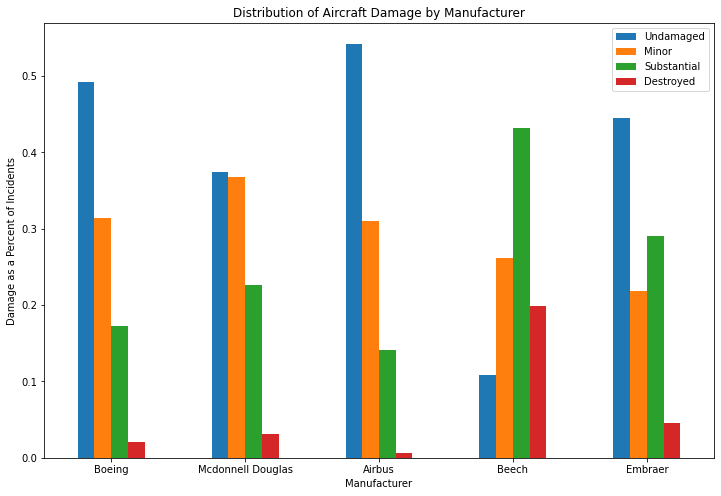

In [86]:
manufacturer_damage_level.plot(kind='bar', xlabel='Manufacturer', 
                                                               ylabel='Damage as a Percent of Incidents', 
                                                               title='Distribution of Aircraft Damage by Manufacturer',
                                                               figsize=(12,8), 
                                                              rot=0);